In [2]:
import os
os.getcwd()

'C:\\Users\\win\\ML\\External'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.shape

(891, 15)

In [11]:
# preprocessing steps 
# checking missing value
df.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [12]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
print("age", 714/891)

age 0.8013468013468014


<AxesSubplot:ylabel='age'>

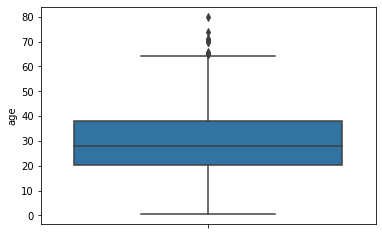

In [14]:
sns.boxplot(y ='age', data=df)

In [15]:
df['age'] = df['age'].fillna(df['age'].median())

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
print('deck',688/891)

deck 0.7721661054994389


In [18]:
# pls drop 'deck' column

In [19]:
df = df.drop(['deck'],axis=1)

In [20]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [21]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [22]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [23]:
df['embarked'] = df['embarked'].fillna('S')

In [24]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [25]:
df['embark_town'].value_counts()
# since 'embark_town' is the full form of 'embarked' value
# so we have to drop this variable 

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [26]:
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [27]:
df = df.drop(['embark_town'], axis=1)

In [28]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [29]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,yes,False


In [ ]:
# drop alive as it's duplicate variable

In [30]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [31]:
df.describe(include='O')

,sex,embarked,who,alive
count,891,891,891,891
unique,2,3,3,2
top,male,S,man,no
freq,577,646,537,549


In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')

In [33]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [34]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [35]:
df = df.drop(['pclass'], axis=1)

In [36]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [37]:
df = df.drop(['alive','alone'], axis=1)

In [38]:
df.head(20)

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male
0,0,male,22.0,1,0,7.2500,S,Third,man,True
1,1,female,38.0,1,0,71.2833,C,First,woman,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False
3,1,female,35.0,1,0,53.1000,S,First,woman,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True
5,0,male,28.0,0,0,8.4583,Q,Third,man,True
6,0,male,54.0,0,0,51.8625,S,First,man,True
7,0,male,2.0,3,1,21.0750,S,Third,child,False
8,1,female,27.0,0,2,11.1333,S,Third,woman,False
9,1,female,14.0,1,0,30.0708,C,Second,child,False


In [39]:
df = df.drop(['who', 'adult_male','fare'], axis = 1)

In [40]:
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,male,22.0,1,0,S,Third
1,1,female,38.0,1,0,C,First
2,1,female,26.0,0,0,S,Third
3,1,female,35.0,1,0,S,First
4,0,male,35.0,0,0,S,Third


In [41]:
df.isnull().sum()

survived    0
sex         0
age         0
sibsp       0
parch       0
embarked    0
class       0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   sex       891 non-null    object  
 2   age       891 non-null    float64 
 3   sibsp     891 non-null    int64   
 4   parch     891 non-null    int64   
 5   embarked  891 non-null    object  
 6   class     891 non-null    category
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 42.9+ KB


In [43]:
df['sex'] = df['sex'].astype('category')
df['sex'] = df['sex'].cat.codes
df.head()

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,S,Third
1,1,0,38.0,1,0,C,First
2,1,0,26.0,0,0,S,Third
3,1,0,35.0,1,0,S,First
4,0,1,35.0,0,0,S,Third


In [44]:
df['embarked'] = df['embarked'].astype('category')
df['embarked'] = df['embarked'].cat.codes
df.head(10)

,survived,sex,age,sibsp,parch,embarked,class
0,0,1,22.0,1,0,2,Third
1,1,0,38.0,1,0,0,First
2,1,0,26.0,0,0,2,Third
3,1,0,35.0,1,0,2,First
4,0,1,35.0,0,0,2,Third
5,0,1,28.0,0,0,1,Third
6,0,1,54.0,0,0,2,First
7,0,1,2.0,3,1,2,Third
8,1,0,27.0,0,2,2,Third
9,1,0,14.0,1,0,0,Second


In [45]:
df = pd.get_dummies(df, columns=['embarked'])

In [46]:
df.head()

,survived,sex,age,sibsp,parch,class,embarked_0,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,0,1
1,1,0,38.0,1,0,First,1,0,0
2,1,0,26.0,0,0,Third,0,0,1
3,1,0,35.0,1,0,First,0,0,1
4,0,1,35.0,0,0,Third,0,0,1


In [47]:
df = df.drop(['embarked_0'], axis=1)

In [48]:
df.head()

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,Third,0,1
1,1,0,38.0,1,0,First,0,0
2,1,0,26.0,0,0,Third,0,1
3,1,0,35.0,1,0,First,0,1
4,0,1,35.0,0,0,Third,0,1


In [49]:
df['class'] = df['class'].astype('category')
df['class'] = df['class'].cat.codes
df.head(10)

,survived,sex,age,sibsp,parch,class,embarked_1,embarked_2
0,0,1,22.0,1,0,2,0,1
1,1,0,38.0,1,0,0,0,0
2,1,0,26.0,0,0,2,0,1
3,1,0,35.0,1,0,0,0,1
4,0,1,35.0,0,0,2,0,1
5,0,1,28.0,0,0,2,1,0
6,0,1,54.0,0,0,0,0,1
7,0,1,2.0,3,1,2,0,1
8,1,0,27.0,0,2,2,0,1
9,1,0,14.0,1,0,1,0,0


In [50]:
df = pd.get_dummies(df, columns=['class'])

In [51]:
df.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_0,class_1,class_2
0,0,1,22.0,1,0,0,1,0,0,1
1,1,0,38.0,1,0,0,0,1,0,0
2,1,0,26.0,0,0,0,1,0,0,1
3,1,0,35.0,1,0,0,1,1,0,0
4,0,1,35.0,0,0,0,1,0,0,1


In [52]:
df = df.drop(['class_0'],axis=1)

In [53]:
df.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [54]:
# sigmoid
# outlier is non-significant activities in logistic regression
df['age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [55]:
# feature scaling is not required as most of the data are in binary format and also age is given less than 100
# imbalance dataset check
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

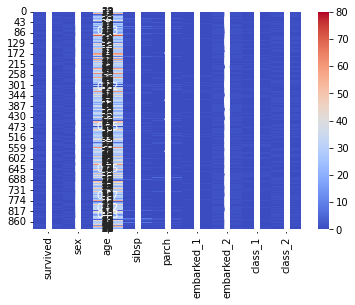

In [56]:
sns.heatmap(df, annot=True, cmap='coolwarm')

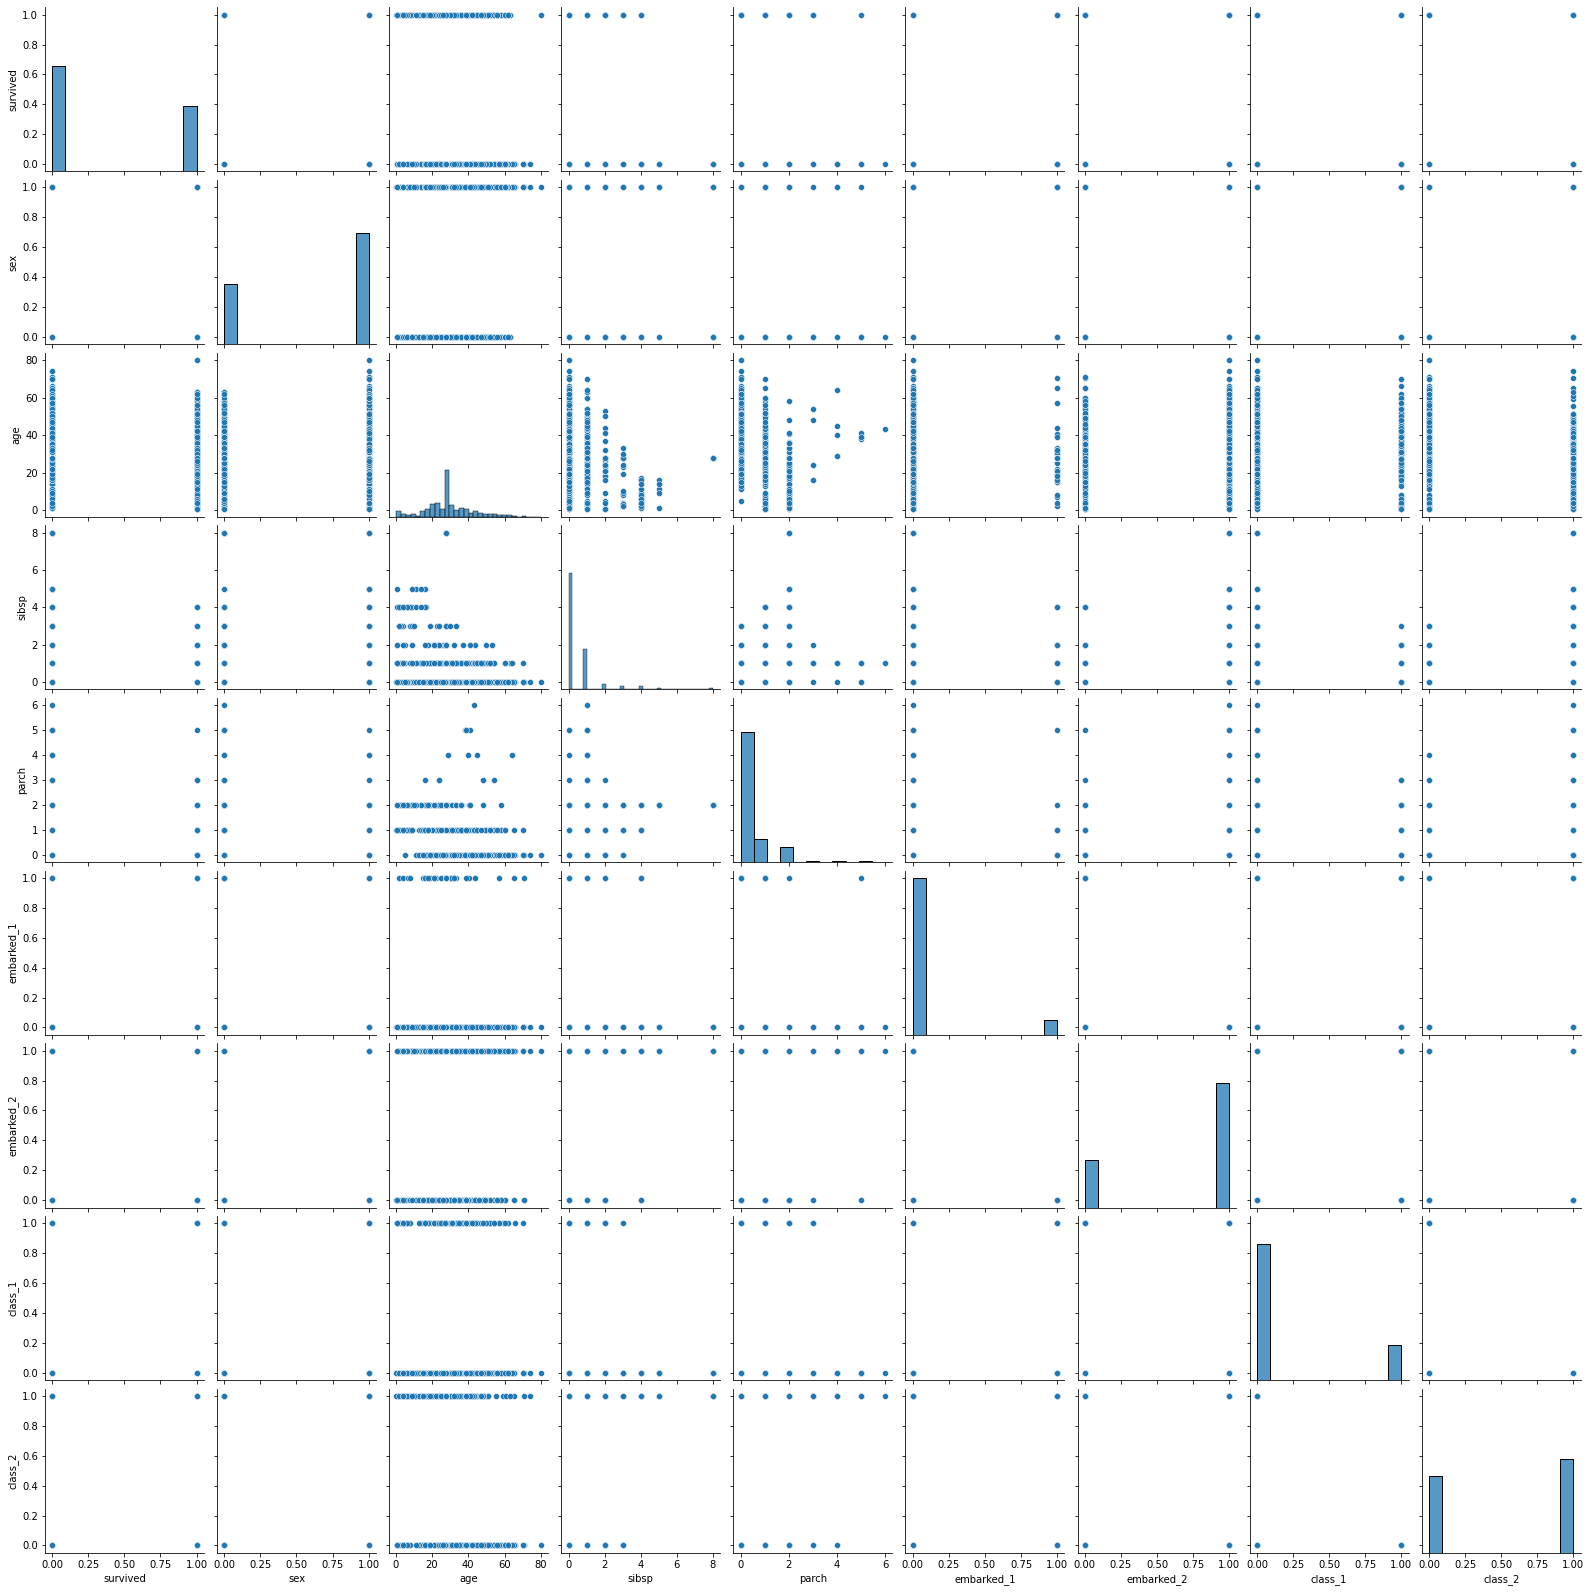

In [52]:
sns.pairplot(df)

In [57]:
df.head()

,survived,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,0,1,22.0,1,0,0,1,0,1
1,1,0,38.0,1,0,0,0,0,0
2,1,0,26.0,0,0,0,1,0,1
3,1,0,35.0,1,0,0,1,0,0
4,0,1,35.0,0,0,0,1,0,1


In [54]:
# split the data into dependent variable and independent variable
x = df.iloc[:,1:].values
y = df['survived'].values

In [55]:
x

array([[ 1., 22.,  1., ...,  1.,  0.,  1.],
       [ 0., 38.,  1., ...,  0.,  0.,  0.],
       [ 0., 26.,  0., ...,  1.,  0.,  1.],
       ...,
       [ 0., 28.,  1., ...,  1.,  0.,  1.],
       [ 1., 26.,  0., ...,  0.,  0.,  0.],
       [ 1., 32.,  0., ...,  0.,  0.,  1.]])

In [56]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [58]:
# split the data into training and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state=1)
print(x_train.shape)
print("###"*50)
print(x_test.shape)
print("###"*50)
print(y_train.shape)
print("###"*50)
print(y_test.shape)
print("###"*50)

(668, 8)
######################################################################################################################################################
(223, 8)
######################################################################################################################################################
(668,)
######################################################################################################################################################
(223,)
######################################################################################################################################################


# Building Logistic Regression Model

In [60]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [61]:
y_pred_test = logit_model.predict(x_test)

In [62]:
y_pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0], dtype=int64)

In [63]:
y_test

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [65]:
print(confusion_matrix(y_test, y_pred_test))

[[114  14]
 [ 29  66]]


In [67]:
(114+66)/(114+14+29+66)

0.8071748878923767

In [66]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       128
           1       0.82      0.69      0.75        95

    accuracy                           0.81       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.81      0.81      0.80       223



In [68]:
print(accuracy_score(y_test, y_pred_test))

0.8071748878923767


In [ ]:
# test result = 80.71%
# training result = ?

In [69]:
y_pred_train = logit_model.predict(x_train)

In [70]:
y_pred_train

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [71]:
y_train

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

In [73]:
accuracy_score(y_train, y_pred_train)

0.8098802395209581

In [ ]:
# test result = 80.71%
# training result = 80.98%

In [81]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc =  roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

0.7926809210526315

In [74]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
display(fpr[:10])
display(tpr[:10])
display(thresholds[:10])

array([0.      , 0.109375, 1.      ])

array([0.        , 0.69473684, 1.        ])

array([2, 1, 0], dtype=int64)

# Plotting ROC and AUC 

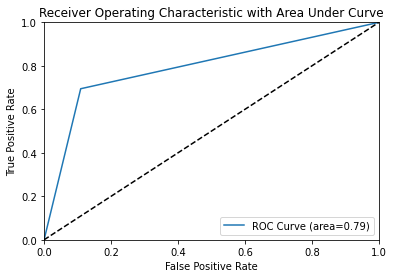

In [82]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" % logistic_roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

# K-Fold method (cross validation approach)

In [85]:
from sklearn.model_selection import cross_val_score
accuracy_training = cross_val_score(logit_model, x_train, y_train, cv=15)
accuracy_test = cross_val_score(logit_model, x_test, y_test, cv=15)
print(accuracy_training)
print("######"*50)
print(accuracy_test)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

[0.66666667 0.77777778 0.75555556 0.84444444 0.8        0.77777778
 0.93333333 0.82222222 0.90909091 0.81818182 0.81818182 0.84090909
 0.84090909 0.72727273 0.81818182]
############################################################################################################################################################################################################################################################################################################
[0.8        0.73333333 0.66666667 0.73333333 0.6        0.8
 0.8        0.73333333 1.         0.73333333 0.8        0.8
 0.86666667 0.78571429 0.78571429]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [87]:
print("Training Accuracy :", accuracy_training[6])
print("######"*50)
print("Test Accuracy :", accuracy_test[8])

Training Accuracy : 0.9333333333333333
############################################################################################################################################################################################################################################################################################################
Test Accuracy : 1.0


In [88]:
test_file = pd.read_csv("test.csv")
test_file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
"""
survived	sex	age	sibsp	parch	embarked	class
"""

In [89]:
test_file.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
test_file = test_file[['Sex','Age','SibSp', 'Parch','Embarked','Pclass']]

In [92]:
test_file.head()

,Sex,Age,SibSp,Parch,Embarked,Pclass
0,male,34.5,0,0,Q,3
1,female,47.0,1,0,S,3
2,male,62.0,0,0,Q,2
3,male,27.0,0,0,S,3
4,female,22.0,1,1,S,3


In [93]:
test_file.isnull().sum()

Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
Pclass       0
dtype: int64

In [94]:
test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1276/258733913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Age'] = test_file['Age'].fillna(test_file['Age'].median())


In [95]:
test_file.isnull().sum()

Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Pclass      0
dtype: int64

In [96]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       418 non-null    object 
 1   Age       418 non-null    float64
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Embarked  418 non-null    object 
 5   Pclass    418 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [97]:
test_file['Sex'] = test_file['Sex'].astype('category')
test_file['Sex'] = test_file['Sex'].cat.codes
test_file = pd.get_dummies(test_file, columns=['Sex'])

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1276/3245022850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Sex'] = test_file['Sex'].astype('category')
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_1276/3245022850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_file['Sex'] = test_file['Sex'].cat.codes


In [98]:
test_file.head()

,Age,SibSp,Parch,Embarked,Pclass,Sex_0,Sex_1
0,34.5,0,0,Q,3,0,1
1,47.0,1,0,S,3,1,0
2,62.0,0,0,Q,2,0,1
3,27.0,0,0,S,3,0,1
4,22.0,1,1,S,3,1,0


In [99]:
test_file = test_file.drop(['Sex_0'], axis=1)

In [100]:
test_file.head()

,Age,SibSp,Parch,Embarked,Pclass,Sex_1
0,34.5,0,0,Q,3,1
1,47.0,1,0,S,3,0
2,62.0,0,0,Q,2,1
3,27.0,0,0,S,3,1
4,22.0,1,1,S,3,0


In [101]:
test_file['Embarked'] = test_file['Embarked'].astype('category')
test_file['Embarked'] = test_file['Embarked'].cat.codes
test_file = pd.get_dummies(test_file, columns=['Embarked'])

In [102]:
test_file.head()

,Age,SibSp,Parch,Pclass,Sex_1,Embarked_0,Embarked_1,Embarked_2
0,34.5,0,0,3,1,0,1,0
1,47.0,1,0,3,0,0,0,1
2,62.0,0,0,2,1,0,1,0
3,27.0,0,0,3,1,0,0,1
4,22.0,1,1,3,0,0,0,1


In [103]:
test_file = test_file.drop(['Embarked_0'], axis=1)

In [104]:
test_file

,Age,SibSp,Parch,Pclass,Sex_1,Embarked_1,Embarked_2
0,34.5,0,0,3,1,1,0
1,47.0,1,0,3,0,0,1
2,62.0,0,0,2,1,1,0
3,27.0,0,0,3,1,0,1
4,22.0,1,1,3,0,0,1
...,...,...,...,...,...,...,...
413,27.0,0,0,3,1,0,1
414,39.0,0,0,1,0,0,0
415,38.5,0,0,3,1,0,1
416,27.0,0,0,3,1,0,1


In [106]:
test_file = pd.get_dummies(test_file, columns=['Pclass'])

In [107]:
test_file.head()

,Age,SibSp,Parch,Sex_1,Embarked_1,Embarked_2,Pclass_1,Pclass_2,Pclass_3
0,34.5,0,0,1,1,0,0,0,1
1,47.0,1,0,0,0,1,0,0,1
2,62.0,0,0,1,1,0,0,1,0
3,27.0,0,0,1,0,1,0,0,1
4,22.0,1,1,0,0,1,0,0,1


In [108]:
test_file = test_file.drop(['Pclass_1'], axis=1)

In [109]:
test_file.head()

,Age,SibSp,Parch,Sex_1,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,34.5,0,0,1,1,0,0,1
1,47.0,1,0,0,0,1,0,1
2,62.0,0,0,1,1,0,1,0
3,27.0,0,0,1,0,1,0,1
4,22.0,1,1,0,0,1,0,1


In [110]:
print(df.head(2))
print("#"*50)
print(test_file.head(2))

   survived  sex   age  sibsp  parch  embarked_1  embarked_2  class_1  class_2
0         0    1  22.0      1      0           0           1        0        1
1         1    0  38.0      1      0           0           0        0        0
##################################################
    Age  SibSp  Parch  Sex_1  Embarked_1  Embarked_2  Pclass_2  Pclass_3
0  34.5      0      0      1           1           0         0         1
1  47.0      1      0      0           0           1         0         1


In [112]:
test_file = test_file[['Sex_1','Age','SibSp','Parch','Embarked_1', 'Embarked_2', 'Pclass_2',  'Pclass_3']]

In [114]:
test_file.head(2)

,Sex_1,Age,SibSp,Parch,Embarked_1,Embarked_2,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1


In [113]:
print(df.head(2))
print("#"*50)
print(test_file.head(2))

   survived  sex   age  sibsp  parch  embarked_1  embarked_2  class_1  class_2
0         0    1  22.0      1      0           0           1        0        1
1         1    0  38.0      1      0           0           0        0        0
##################################################
   Sex_1   Age  SibSp  Parch  Embarked_1  Embarked_2  Pclass_2  Pclass_3
0      1  34.5      0      0           1           0         0         1
1      0  47.0      1      0           0           1         0         1


In [115]:
column_name = [['sex', 'age', 'sibsp', 'parch', 'embarked_1', 'embarked_2', 'class_1', 'class_2']]

In [116]:
test_file.columns = column_name

In [117]:
test_file.head()

,sex,age,sibsp,parch,embarked_1,embarked_2,class_1,class_2
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [118]:
print(df.head(2))
print("#"*50)
print(test_file.head(2))

   survived  sex   age  sibsp  parch  embarked_1  embarked_2  class_1  class_2
0         0    1  22.0      1      0           0           1        0        1
1         1    0  38.0      1      0           0           0        0        0
##################################################
  sex   age sibsp parch embarked_1 embarked_2 class_1 class_2
0   1  34.5     0     0          1          0       0       1
1   0  47.0     1     0          0          1       0       1


# predict the dependent variable with test_file dataset by using Logit_model 

In [119]:
y_pred_test_file = logit_model.predict(test_file)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [120]:
y_pred_test_file

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
y_pred_test_file = pd.DataFrame(y_pred_test_file)

In [124]:
y_pred_test_file.head()

,0
0,0
1,0
2,0
3,0
4,1


In [130]:
newdata = pd.read_csv('test.csv')
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
newdata = pd.concat([newdata,y_pred_test_file], axis=1)

In [132]:
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [133]:
column_name = [['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket','Fare', 'Cabin','Embarked','Survived']]

In [134]:
newdata.columns = column_name

In [135]:
newdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [136]:
newdata.to_csv("predicted_output.csv")